In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('chess_games.csv')

In [5]:
df_reduced.dropna(inplace=True)
df_reduced.drop_duplicates(inplace=True)
print(df_reduced.shape)

(3125819, 15)


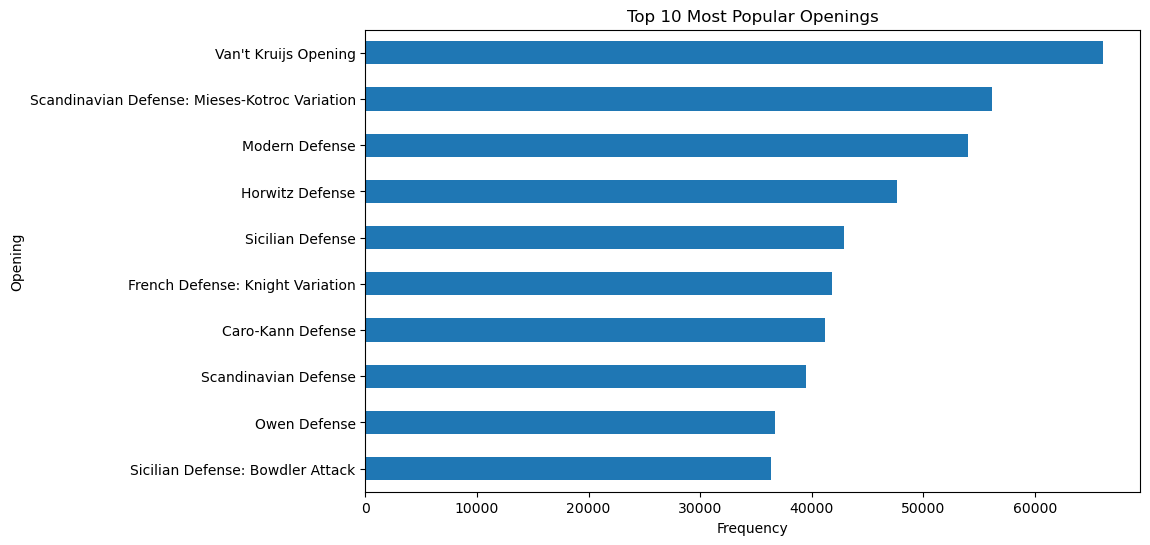

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df_reduced' is your DataFrame containing all attributes

# Group by 'Opening' and count the occurrences of each opening
opening_counts = df_reduced['Opening'].value_counts()

# Get the top 10 most popular openings
top_10_openings = opening_counts.head(10)

# Plot a horizontal bar plot for the top 10 most popular openings
plt.figure(figsize=(10, 6))
top_10_openings.sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Frequency')
plt.ylabel('Opening')
plt.title('Top 10 Most Popular Openings')
plt.show()


In [4]:
df_reduced = data.sample(frac=0.5, random_state=42)

In [10]:
print(df_reduced.shape)


(1564046, 15)


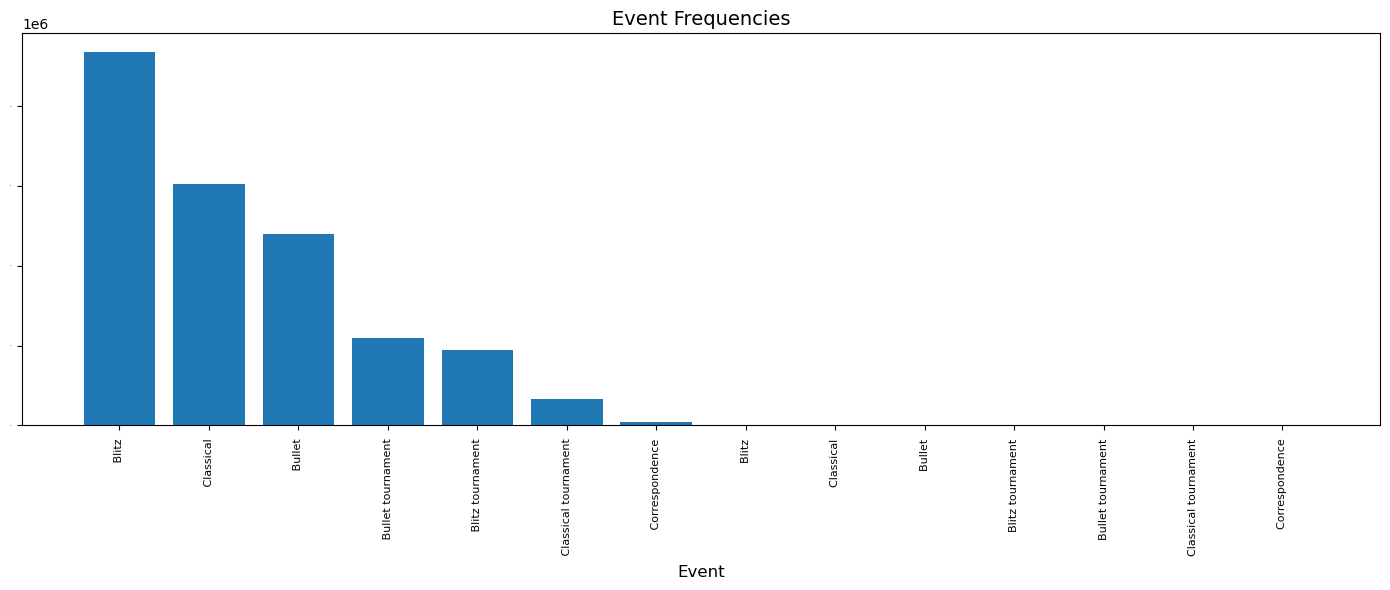

In [4]:
event_counts = data['Event'].value_counts()
plt.figure(figsize=(14, 6))
plt.bar(event_counts.index, event_counts.values)
plt.xlabel('Event', fontsize=12)  # Use 'Event' as x-axis label
plt.title('Event Frequencies', fontsize=14)
plt.xticks(rotation=90, fontsize=8)  # Rotate and adjust font size for x-axis labels
plt.tick_params(axis='y', labelsize=0)  # Remove y-axis labels
plt.tight_layout()  # Ensure the labels are not cut off
plt.show()

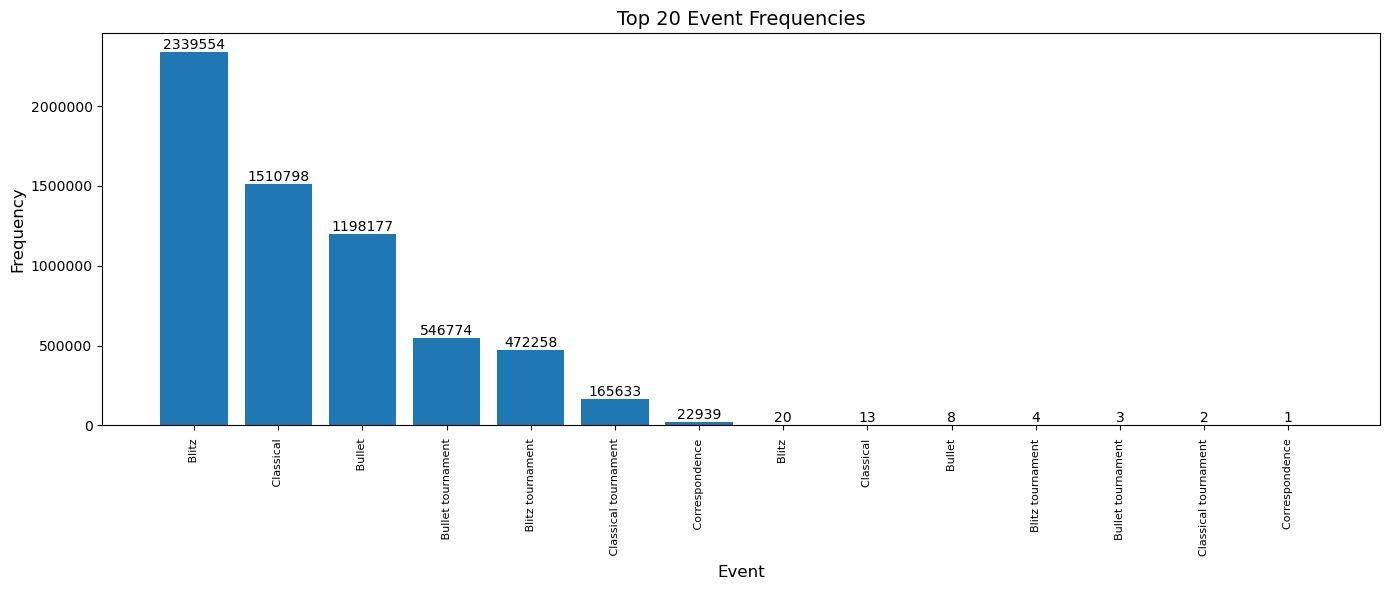

In [8]:
# Compute the event frequencies
event_counts = data['Event'].value_counts()

# Reduce the scale of the y-axis (show top 20 most frequent events)
plt.figure(figsize=(14, 6))
plt.bar(event_counts.index[:20], event_counts.values[:20])
plt.xlabel('Event', fontsize=12)  # Use 'Event' as x-axis label
plt.ylabel('Frequency', fontsize=12)  # Add y-axis label
plt.title('Top 20 Event Frequencies', fontsize=14)

# Format the y-axis ticks with comma-separated values
plt.ticklabel_format(style='plain', axis='y')

plt.xticks(rotation=90, fontsize=8)  # Rotate and adjust font size for x-axis labels

# Annotate each bar with its respective count value
for index, value in enumerate(event_counts.values[:20]):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()  # Ensure the labels are not cut off
plt.show()

In [35]:
print(df_encoded.columns)

Index(['Event', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'Event',
       'WhiteElo', 'BlackElo', 'WhiteRatingDiff', 'BlackRatingDiff'],
      dtype='object')


In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Assuming your preprocessed dataset is stored in a variable called 'df_encoded'
# Select the relevant attributes as features (X) and the target variable (y)
features = ['WhiteElo', 'Result']  # Using 'WhiteElo', 'BlackElo', and 'Result' as features
X = data[features].copy()
y = data['BlackElo']  # Target variable is 'BlackElo'

# Map 'Result' to numeric values using ordinal encoding
result_mapping = {"1-0": 1, "0-1": -1, "1/2-1/2": 0}
X.loc[:, 'Result'] = X['Result'].map(result_mapping)

# Preprocess categorical variables (not needed for this example as there are no categorical columns)

# Handle missing values in the target variable (y)
y = y.fillna(y.mean())

# Handle missing values in the features (X) if any
X = X.fillna(X.mean())

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse)
print(r2)


# Example values for new data
new_data = pd.DataFrame([[1248,'1-0']], columns=['WhiteElo', 'Result'])  # 'Result' is given as '1-0' (White wins)

# Map 'Result' to numeric values in the new data using the same mapping as before
new_data['Result'] = new_data['Result'].map(result_mapping)

# Make predictions on the new data
predicted_black_elo = model.predict(new_data)

# Print the predicted 'BlackElo'
print('Predicted BlackElo:', predicted_black_elo[0])


31020.350165947464
0.5650025212641757
Predicted BlackElo: 1304.7724262380634


In [6]:
# Example values for new data
new_data = pd.DataFrame([[1706,'1-0']], columns=['WhiteElo', 'Result'])  # 'Result' is given as '1-0' (White wins)

# Map 'Result' to numeric values in the new data using the same mapping as before
new_data['Result'] = new_data['Result'].map(result_mapping)

# Make predictions on the new data
predicted_black_elo = model.predict(new_data)

# Print the predicted 'BlackElo'
print('Predicted BlackElo:', predicted_black_elo[0])


Predicted BlackElo: 1647.7463677259914


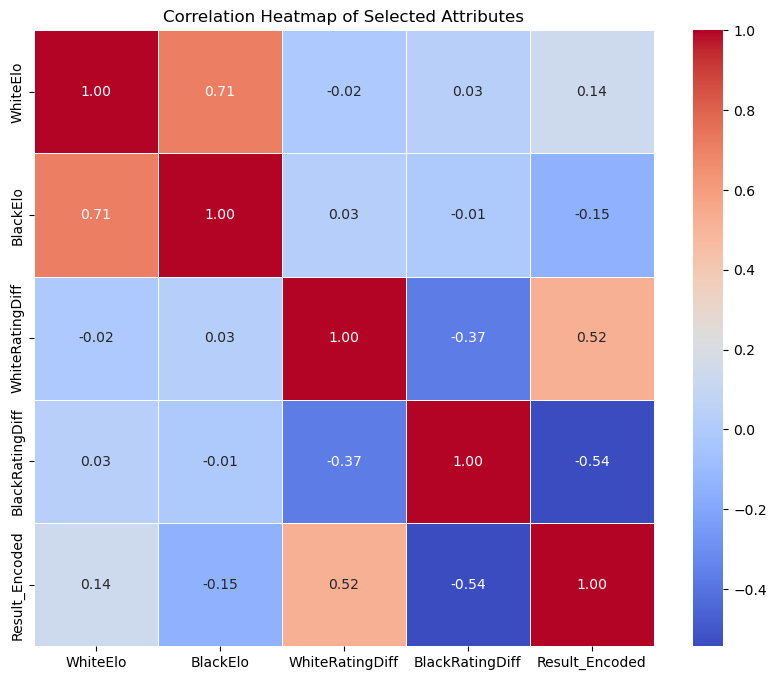

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df_reduced' is your DataFrame containing all attributes

# Encode 'Result' into numerical values
result_mapping = {'1-0': 1, '0-1': -1, '1/2-1/2': 0}
df_reduced['Result_Encoded'] = df_reduced['Result'].map(result_mapping)

# Select the attributes to include in the correlation matrix (excluding 'TimeControl')
selected_attributes = ['WhiteElo', 'BlackElo', 'WhiteRatingDiff', 'BlackRatingDiff', 'Result_Encoded']

# Create a subset of the DataFrame with selected attributes
df_selected = df_reduced[selected_attributes]

# Calculate the correlation matrix
correlation_matrix = df_selected.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Attributes')
plt.show()


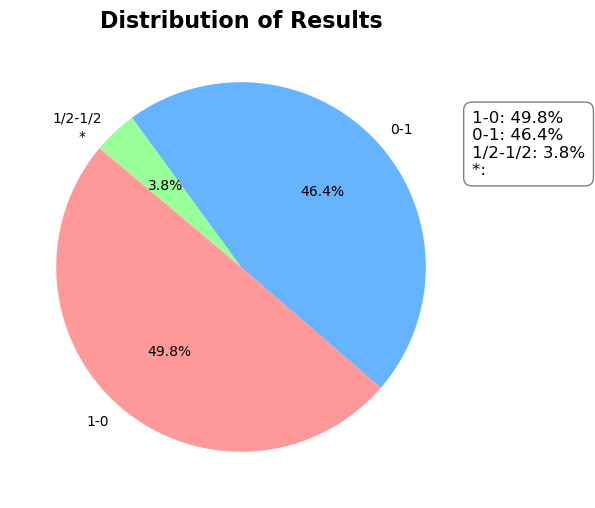

In [23]:
import matplotlib.pyplot as plt

# Assuming you have already calculated Result_counts from your data
Result_counts = data['Result'].value_counts()

# Define custom colors for the pie chart
colors = ['#ff9999', '#66b3ff', '#99ff99']

# Create a custom autopct function to exclude "0.0%" labels and display percentages only in the box
def autopct_format(pct):
    return f"{pct:.1f}%" if pct > 0.5 else ""

# Create a pie chart with a solid center
plt.figure(figsize=(10, 6))  # Adjust the figure size to fit the box beside the chart
patches, texts, autotexts = plt.pie(Result_counts.values, labels=Result_counts.index, colors=colors, autopct=autopct_format, startangle=140, wedgeprops={'linewidth': 0})

# Add a title
title = 'Distribution of Results'
plt.title(title, fontsize=16, fontweight='bold')

# Equal aspect ratio ensures that the pie chart is circular
plt.gca().set_aspect("equal")

# Customize the font size of labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Remove unnecessary chart borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Add information box beside the chart with percentages only
info_text = "\n".join(f"{label}: {pct}" for label, pct in zip(Result_counts.index, [autotext.get_text() for autotext in autotexts]))
plt.text(1.25, 0.5, info_text, fontsize=12, bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))

# Display the chart
plt.show()


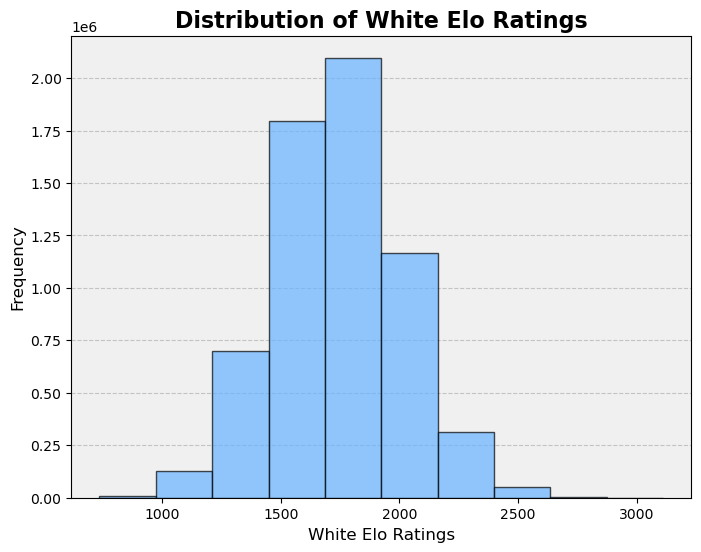

In [26]:
import matplotlib.pyplot as plt

# Assuming you have the data and 'WhiteElo' column

# Define custom color for the bars in the histogram
color = '#66b3ff'

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the histogram
plt.hist(data['WhiteElo'], bins=10, color=color, edgecolor='black', alpha=0.7)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Customize the axes labels and title
plt.xlabel('White Elo Ratings', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of White Elo Ratings', fontsize=16, fontweight='bold')

# Add a background color to the plot
ax.set_facecolor('#f0f0f0')

# Customize the ticks and labels font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add a subtle shadow to the plot for depth
plt.gca().set_axisbelow(True)

# Show the plot
plt.show()


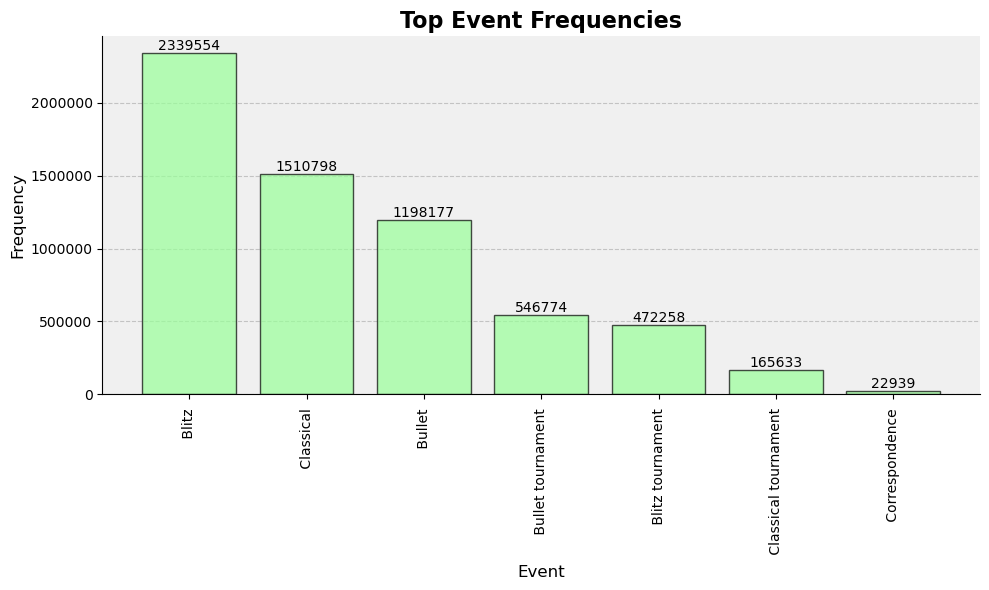

In [33]:
import matplotlib.pyplot as plt

# Assuming you have already calculated event_counts from your data
# event_counts = data['Event'].value_counts()

# Select the top 7 events
top_events = event_counts.head(7)

# Define custom color for the bars in the bar chart (for example, green)
color = '#99ff99'

# Reduce the scale of the y-axis (show only the top 7 events)
plt.figure(figsize=(10, 6))
plt.bar(top_events.index, top_events.values, color=color, edgecolor='black', alpha=0.7)

plt.xlabel('Event', fontsize=12)  # Use 'Event' as x-axis label
plt.ylabel('Frequency', fontsize=12)  # Add y-axis label
plt.title('Top Event Frequencies', fontsize=16, fontweight='bold')

# Format the y-axis ticks with comma-separated values
plt.ticklabel_format(style='plain', axis='y')

plt.xticks(rotation=90, fontsize=10)  # Rotate and adjust font size for x-axis labels

# Annotate each bar with its respective count value
for index, value in enumerate(top_events.values):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

# Remove top and right spines for cleaner appearance
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Customize gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a subtle shadow to the plot for depth
plt.gca().set_axisbelow(True)

# Add a background color to the plot
plt.gca().set_facecolor('#f0f0f0')

plt.tight_layout()  # Ensure the labels are not cut off
plt.show()


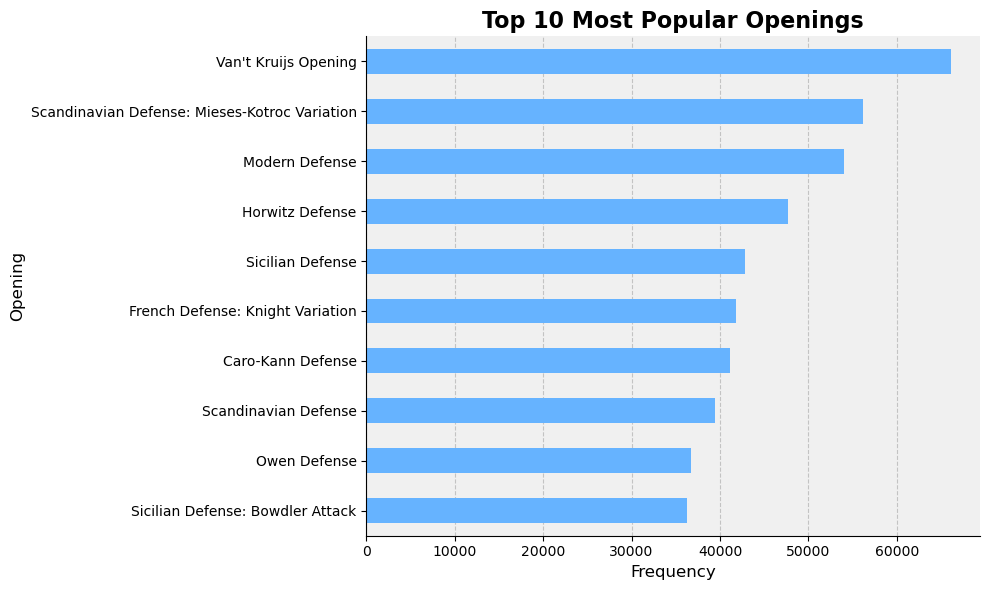

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df_reduced' is your DataFrame containing all attributes

# Group by 'Opening' and count the occurrences of each opening
opening_counts = df_reduced['Opening'].value_counts()

# Get the top 10 most popular openings
top_10_openings = opening_counts.head(10)

# Define custom color for the bars in the bar plot
color = '#66b3ff'

# Plot a horizontal bar plot for the top 10 most popular openings
plt.figure(figsize=(10, 6))
top_10_openings.sort_values(ascending=True).plot(kind='barh', color=color)

plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Opening', fontsize=12)
plt.title('Top 10 Most Popular Openings', fontsize=16, fontweight='bold')

# Customize the ticks and labels font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Remove top and right spines for cleaner appearance
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Customize gridlines
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add a subtle shadow to the plot for depth
plt.gca().set_axisbelow(True)

# Add a background color to the plot
plt.gca().set_facecolor('#f0f0f0')

plt.tight_layout()  # Ensure the labels are not cut off
plt.show()


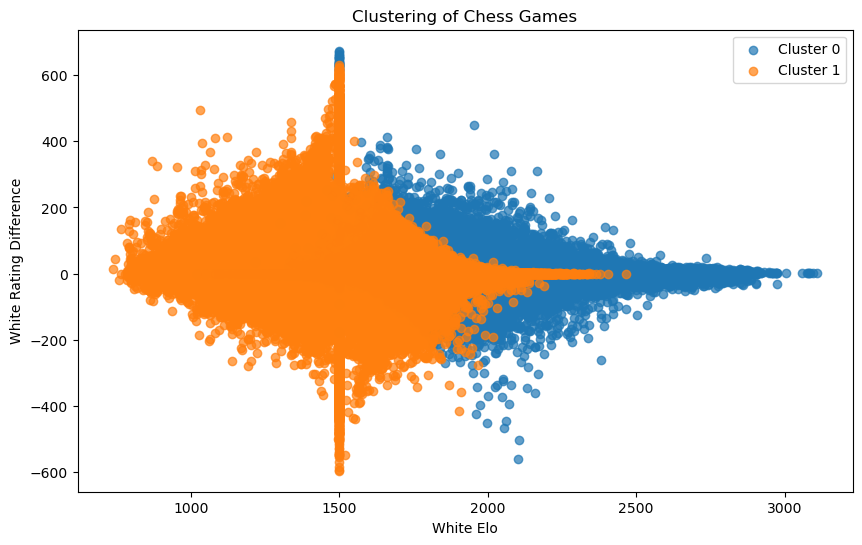

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming 'df_reduced' is your DataFrame containing all attributes

# Select the attributes for clustering
selected_attributes = ['WhiteElo', 'WhiteRatingDiff', 'BlackElo', 'BlackRatingDiff']

# Create a subset of the DataFrame with selected attributes and drop any duplicates or missing values
df_selected = df_reduced[selected_attributes].drop_duplicates().dropna()

# Standardize the data before clustering
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)

# Choose the number of clusters (let's say 2 clusters for this example)
n_clusters = 2

# Apply K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_selected['Cluster'] = kmeans.fit_predict(df_scaled)

# Keep only the data points belonging to the two clusters
cluster0 = df_selected[df_selected['Cluster'] == 0]
cluster1 = df_selected[df_selected['Cluster'] == 1]

# Visualization (optional)
plt.figure(figsize=(10, 6))
plt.scatter(cluster0['WhiteElo'], cluster0['WhiteRatingDiff'], label='Cluster 0', alpha=0.7)
plt.scatter(cluster1['WhiteElo'], cluster1['WhiteRatingDiff'], label='Cluster 1', alpha=0.7)
plt.xlabel('White Elo')
plt.ylabel('White Rating Difference')
plt.title('Clustering of Chess Games')
plt.legend()
plt.show()
